In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Work\\AIIM\\gretel-silver\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager

from src.utils.context import Context
import sys

In [4]:
config_f_name = '2-TCR-128-32-0.2_GCN_OBS.jsonc'

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\2-TCR-128-32-0.2_GCN_OBS.jsonc
2024-04-15 12:49:52,-513758760 | INFO | 7332 - Executing: c:\Work\AIIM\gretel-silver\GRETEL\lab\config\2-TCR-128-32-0.2_GCN_OBS.jsonc Run: 1
2024-04-15 12:49:52,-513758735 | INFO | 7332 - Creating the evaluation manager....................................
2024-04-15 12:49:52,-513758693 | INFO | 7332 - Creating the paired  evaluators.....................................
2024-04-15 12:49:52,-513758559 | INFO | 7332 - Creating: TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37
2024-04-15 12:49:52,-513758558 | INFO | 7332 - Instantiating: src.dataset.generators.treecycles_rand.TreeCyclesRand
2024-04-15 12:49:52,-513758526 | INFO | 7332 - Generated instance with id:0
2024-04-15 12:49:52,-513758502 | INFO | 7332 - Generated instance with id:1
2024-04-15 12:49:52,-513758468 | INFO | 7332 - Generated instance with id:2
2024-04-15 12:49:52,-513758443 | INFO | 7332 - Generated instance with id:3
202

In [6]:
evaluator = eval_manager.evaluators[0]
evaluator

In [7]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

In [8]:
from src.data_analysis.data_analyzer import DataAnalyzer as dan
changes = dan.get_cf_changes(og_inst, cf_inst, False)

In [9]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(17, 30), (18, 28), (21, 27), (24, 29)]
removed_edges: [(26, 28), (27, 28), (29, 30), (30, 31)]
added nodes: []
removed nodes: []


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
layout = nx.spring_layout
pos = layout(og_inst.get_nx())

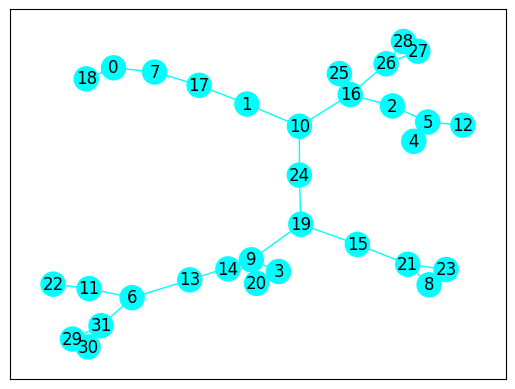

In [16]:
pos = dan.draw_graph(og_inst)

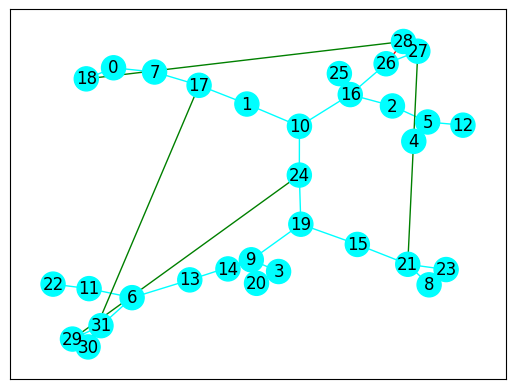

In [17]:
dan.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [18]:
import pandas as pd
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = dan.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)


AttributeError: type object 'DataAnalyzer' has no attribute 'create_aggregated_dataframe_oldstyle'